### Starting with the sentiment analysis assignment

#### Importing the required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os 
import string
import nltk
from nltk.corpus import stopwords
import re # to replace words
nltk.download('words') # dictionary 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DN731WG\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DN731WG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data=pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
data.shape

(50000, 2)

In [5]:
data.iloc[0,0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

#### Converting to lower

In [6]:
data.review=data.review.str.lower()

In [7]:
data.iloc[0,0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

##### Remove Punctuation

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [10]:
data['review']=data['review'].apply(lambda x : remove_punctuation(x))

In [11]:
data.iloc[0,0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [12]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


#### Remove URLs

In [13]:
data['review'] = data['review'].str.replace(r'http\S+|www.\S+','',case=False)

#### Removing Numbers

In [14]:
data['review'] = data['review'].str.replace('\d+', '')
data.iloc[0,0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare for

#### Removing Stop Words

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
data.iloc[0,0]

'one reviewers mentioned watching oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered 

In [18]:
data.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


#### Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DN731WG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [21]:
data['review'] = data.review.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[0,0]

'one reviewers mention watch oz episode youll hook right exactly happen mebr br first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordbr br call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy deal shady agreements never far awaybr br would say main appeal show due fact go show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due 

#### Removing white spaces

In [22]:
data['review'] = (data['review'].astype("str").str.rstrip())
data.iloc[0,0]

'one reviewers mention watch oz episode youll hook right exactly happen mebr br first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordbr br call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy deal shady agreements never far awaybr br would say main appeal show due fact go show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due 

In [23]:
data.head()

,review,sentiment
0,one reviewers mention watch oz episode youll h...,positive
1,wonderful little production br br film techniq...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically theres family little boy jake think ...,negative
4,petter matteis love time money visually stun f...,positive


### Round 2 of cleaning

In [24]:
data.head()

,review,sentiment
0,one reviewers mention watch oz episode youll h...,positive
1,wonderful little production br br film techniq...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically theres family little boy jake think ...,negative
4,petter matteis love time money visually stun f...,positive


In [25]:
import re # replace of words
nltk.download('words') # dictionary 
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DN731WG\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'Lepralia',
 'diploid',
 'hushfully',
 'deploringly',
 'workship',
 'decisional',
 'breedable',
 'numismatologist',
 'preterroyal',
 'scleroticectomy',
 'geomagnetics',
 'megohmmeter',
 'misnutrition',
 'Canangium',
 'mystical',
 'seege',
 'Spaniolate',
 'speculativism',
 'indulgenced',
 'backster',
 'digamist',
 'discovered',
 'coumarinic',
 'Arminianizer',
 'bewet',
 'musketeer',
 'rememberer',
 'sigmoid',
 'Moabitish',
 'ville',
 'malar',
 'posteriority',
 'bachelor',
 'bifanged',
 'pinguidity',
 'assimilator',
 'mopheaded',
 'orrhotherapy',
 'poethood',
 'overdecorative',
 'encephalometer',
 'ministrator',
 'Jerseyan',
 'notionate',
 'hyperorganic',
 'Bashilange',
 'selenitic',
 'underpetticoat',
 'militaryment',
 'Lanuvian',
 'sootless',
 'calligraphically',
 'overdiversify',
 'helldog',
 'paleoatavism',
 'flodge',
 'scientific',
 'scaled',
 'trinitroresorcin',
 'axonometry',
 'ovism',
 'sepic',
 'unmortifiedness',
 'unimpinging',
 'rushiness',
 'sorceress',
 'unaffably',
 'primo

In [26]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                    if w.lower() in words)  #    
    return text

round2 = lambda x: clean_text_round2(x)

In [27]:
data['review'] = pd.DataFrame(data.review.apply(round2))
data.iloc[0,0]

data.head()

,review,sentiment
0,one mention watch episode hook right exactly h...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically theres family little boy jake think ...,negative
4,petter love time money visually stun film watc...,positive


#### Stemming

In [28]:
from nltk.stem.snowball import SnowballStemmer

In [29]:
#Snowball stemmer is the most commonly used stemmer
ss = SnowballStemmer("english")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def SnowballStemmer_text(review): return [ss.stem(w) for w in w_tokenizer.tokenize(review)]

data.head()

data['review'] = data.review.apply(lambda x :' '.join(SnowballStemmer_text(x))) 
data.head()

,review,sentiment
0,one mention watch episod hook right exact happ...,positive
1,wonder littl product film techniqu unassum fas...,positive
2,think wonder way spend time hot summer weekend...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter love time money visual stun film watch ...,positive


In [30]:
data.iloc[0,0]

'one mention watch episod hook right exact happen first thing strike brutal unflinch violenc set right word trust show faint heart timid show pull punch regard drug sex violenc classic use call nicknam give maximum secur state focus main emerald citi experiment section prison glass front face inward privaci high agenda citi home scuffl death star dodgi deal shadi never far would say main appeal show due fact show wouldnt dare forget pretti pictur paint forget charm forget doesnt mess around first episod ever saw strike nasti say readi watch develop tast get accustom high level graphic violenc violenc injustic crook guard sell nickel kill order get away well manner middl class turn prison bitch due lack street prison experi watch may becom comfort uncomfort get touch side'

In [31]:
#Correcting spelling mistakes

# from textblob import TextBlob

# data['review'] = data.review.apply(lambda x :''.join(TextBlob(x).correct()))

#We do not run this code since it takes infinte time to run

#### Splitting the Dataset

In [32]:
#train dataset
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]
#test dataset
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [36]:
#normalized train reviews
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

#Normalized test reviews
norm_test_reviews=data.review[40000:]
norm_test_reviews[40001]

'excit see would hope repres find show funni cast probabl happi get bad good fee back far concern get talk readi stereotyp problem stereotyp exist reason usual true realli wasnt anyth funni stereotyp charact fresh boat dad doesnt understand daughter radic feminist daughter way terribl actress young modern man tri run mosqu polit correct pretti good actor see get contriv doesnt flow well much potenti someth like sad think fail dont realli care watch anoth howev enjoy watch great actress alway treat natur everyth bad daughter show doesnt act'

### Using the bag of words Model

In [37]:
#Count vectorizer for bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 4489387)
BOW_cv_test: (10000, 4489387)


### Organising data

In [38]:
data.to_pickle("corpus_Apple.pkl")

In [39]:
pip install -U sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=46ef4cc9d34c5eb3c51f31119a56f997e4afba21cf8ad2c8b9e585c962dd3370
  Stored in directory: c:\users\dn731wg\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [40]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.review)
data_dtm = pd.DataFrame(data.review.apply(round2))

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
review,one mention watch hook right exact happen firs...,wonder product film fashion give comfort disco...,think wonder way spend time hot summer weekend...,basic there boy jake think there zombi closet ...,petter love time money visual stun film watch ...,probabl selfless bore never get old see time l...,sure would like see resurrect date tech today ...,show fresh idea first air first brilliant drop...,posit comment film look forward watch film bad...,like origin gut wrench laughter like young old...,...,lame lame lame that long set ripe abandon conv...,first time actual like jean actor twist plain ...,play blind fight learn live blind sure hell bu...,two job know throughout world report less equa...,typic junk almost laugh line think clever plot...,think right good job wasnt origin first expect...,bad plot bad bad act idiot direct annoy run ov...,teach school teach high school still practic w...,previous comment side one second rate excess v...,one expect star trek high art fan expect good ...


In [41]:
tdm['freq'] = tdm.sum(axis=1)

In [42]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,49991,49992,49993,49994,49995,49996,49997,49998,49999,freq
0,review,one mention watch hook right exact happen firs...,wonder product film fashion give comfort disco...,think wonder way spend time hot summer weekend...,basic there boy jake think there zombi closet ...,petter love time money visual stun film watch ...,probabl selfless bore never get old see time l...,sure would like see resurrect date tech today ...,show fresh idea first air first brilliant drop...,posit comment film look forward watch film bad...,...,first time actual like jean actor twist plain ...,play blind fight learn live blind sure hell bu...,two job know throughout world report less equa...,typic junk almost laugh line think clever plot...,think right good job wasnt origin first expect...,bad plot bad bad act idiot direct annoy run ov...,teach school teach high school still practic w...,previous comment side one second rate excess v...,one expect star trek high art fan expect good ...,one mention watch hook right exact happen firs...


In [43]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)

## Lambda function to find polarity and subjectivity of each word

In [44]:
!pip install textblob
from textblob import TextBlob

In [45]:
pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['review'].apply(pol)
data.head(5)

,review,sentiment,polarity
0,one mention watch episod hook right exact happ...,positive,0.017143
1,wonder littl product film techniqu unassum fas...,positive,0.215476
2,think wonder way spend time hot summer weekend...,positive,0.347143
3,basic there famili littl boy jake think there ...,negative,-0.007143
4,petter love time money visual stun film watch ...,positive,0.193974


In [49]:
data['Derived_Sent'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,review,sentiment,polarity,Derived_Sent
0,one mention watch episod hook right exact happ...,positive,0.017143,Positive
1,wonder littl product film techniqu unassum fas...,positive,0.215476,Positive
2,think wonder way spend time hot summer weekend...,positive,0.347143,Positive
3,basic there famili littl boy jake think there ...,negative,-0.007143,Negative
4,petter love time money visual stun film watch ...,positive,0.193974,Positive


<AxesSubplot:>

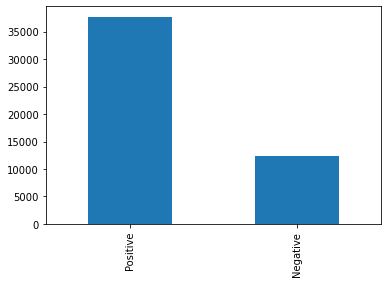

In [50]:
data.Derived_Sent.value_counts().plot.bar()

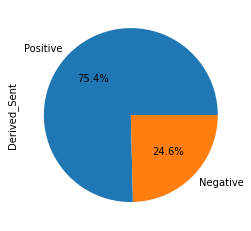

In [53]:
data.Derived_Sent.value_counts().plot.pie(autopct="%.1f%%");

##### Adding Neutral Sentiments 

In [54]:
data['sentiment2'] = np.where(data['polarity']< 0,  'Negative',
                             np.where(data['polarity'] > 0,'Positive', 'Neutral'))
data.head()

,review,sentiment,polarity,Derived_Sent,sentiment2
0,one mention watch episod hook right exact happ...,positive,0.017143,Positive,Positive
1,wonder littl product film techniqu unassum fas...,positive,0.215476,Positive,Positive
2,think wonder way spend time hot summer weekend...,positive,0.347143,Positive,Positive
3,basic there famili littl boy jake think there ...,negative,-0.007143,Negative,Negative
4,petter love time money visual stun film watch ...,positive,0.193974,Positive,Positive


<AxesSubplot:>

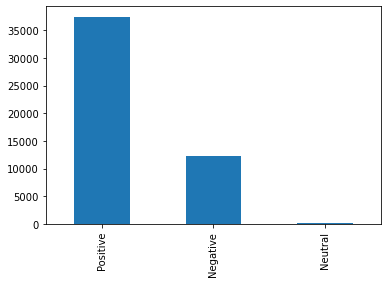

In [56]:
data.sentiment2.value_counts().plot.bar()

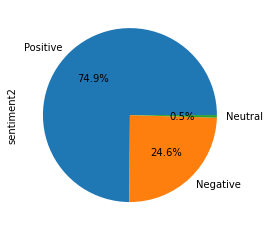

In [57]:
data.sentiment2.value_counts().plot.pie(autopct="%.1f%%");

#### We can see that 0.5% of the total reviews are neutral